In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import b3d
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
import rerun as rr
import sys

sys.path.append(str(b3d.get_root_path()))

In [3]:
from tests.sama4d.video_to_tracks.registration import get_curated_single_patch_tracking_tasks
from tests.sama4d.video_to_tracks.solvers.twod.single_patch_tracker import SinglePatchTracker2D
tasks = get_curated_single_patch_tracking_tasks()

In [4]:
import os
from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d--%H:%M")
folder_name = b3d.get_assets_path() / "test_results" / f"patch_tracking_{current_time}"
os.mkdir(folder_name)

In [5]:
folder_name

PosixPath('/home/georgematheos/b3d/assets/test_results/patch_tracking_2024-08-14--02:00')

In [6]:
# SAVE TO MP4
for (i, task) in enumerate(tasks):
    spec = task.get_task_specification()
    solver = SinglePatchTracker2D()
    solution = solver.solve(spec, log_to_self=True)
    metrics = task.score(solution)
    print(f"Metrics: {metrics}")
    solver.export_mp4(
        spec, task.keypoint_positions_2D,
        solution,
        folder_name / f"{i:02d}_"
    )

/home/georgematheos/b3d/.pixi/envs/gpu/lib/python3.12/site-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Metrics: {'mean_distance_error': Array(3.3608627, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6313726].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.3764706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.39215687].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.39215687].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.39215687].


Metrics: {'mean_distance_error': Array(57.832775, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.39215687].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.39215687].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.39215687].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.39215687].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.4].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.39215687].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7019608].
Clipping input data to the v

Metrics: {'mean_distance_error': Array(1.6535362, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}


In [21]:
import os
from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d--%H:%M")
folder_name = b3d.get_assets_path() / "test_results" / f"patch_tracking_with_reinitialization_{current_time}"
os.mkdir(folder_name)
folder_name

PosixPath('/home/georgematheos/b3d/assets/test_results/patch_tracking_with_reinitialization_2024-08-05--22:06')

In [22]:
from tests.sama4d.video_to_tracks.solvers.twod.single_patch_tracker_with_reinitialization import SinglePatchTracker2DWithReinitialization

# SAVE TO MP4
for (i, task) in enumerate(tasks):
    spec = task.get_task_specification()
    solver = SinglePatchTracker2DWithReinitialization()
    solution = solver.solve(spec, log_to_self=True)
    metrics = task.score(solution)
    print(f"Metrics: {metrics}")
    solver.export_mp4(
        spec, task.keypoint_positions_2D,
        solution,
        folder_name / f"{i:02d}_"
    )

Metrics: {'mean_distance_error': Array(nan, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Metrics: {'mean_distance_error': Array(58.944275, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Metrics: {'mean_distance_error': Array(3.3330085, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(2.6789937, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(4.832836, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(0.4271806, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}
Metrics: {'mean_distance_error': Array(1.9463133, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)}
Metrics: {'mean_distance_error': Array(24.198208, dtype=float32), 'n_er

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Metrics: {'mean_distance_error': Array(nan, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Metrics: {'mean_distance_error': Array(nan, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Metrics: {'mean_distance_error': Array(nan, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Metrics: {'mean_distance_error': Array(20.78023, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(19.570137, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(nan, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Metrics: {'mean_distance_error': Array(2.2670782, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(1.4563601, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}
Metrics: {'mean_distance_error': Array(1.1136217, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}


In [42]:
metrics_array = []

for (i, task) in enumerate(tasks):
    spec = task.get_task_specification()
    solver = SinglePatchTracker2D()
    solution = solver.solve(spec, log_to_self=False)
    metrics = task.score(solution)
    print(f"Metrics: {metrics}")
    metrics_array.append(metrics)

Metrics: {'mean_distance_error': Array(3.3608627, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)}
Metrics: {'mean_distance_error': Array(57.832775, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(1.6535362, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}
Metrics: {'mean_distance_error': Array(1.8179318, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(2.9538, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(0.47859702, dtype=float32), 'n_err

In [43]:
overall_mean_distance_error = jnp.mean(jnp.array([m["mean_distance_error"] for m in metrics_array]))
overall_mean_distance_error

Array(13.773128, dtype=float32)

In [44]:
sum_of_n_errors_above_threshold_per_frame = jnp.sum(jnp.array([m["n_errors_above_threshold_per_frame"] for m in metrics_array]), axis=0)
sum_of_n_errors_above_threshold_per_frame

Array([ 0,  4,  4,  5,  3,  5,  3,  3,  5,  6,  7,  6,  7,  8,  9, 10, 11,
       11, 12, 12], dtype=int32)

In [45]:
metrics_array_2 = []

for (i, task) in enumerate(tasks):
    spec = task.get_task_specification()
    solver = SinglePatchTracker2DWithReinitialization()
    solution = solver.solve(spec, log_to_self=False)
    metrics = task.score(solution)
    print(f"Metrics: {metrics}")
    metrics_array_2.append(metrics)

Metrics: {'mean_distance_error': Array(2.2745528, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)}
Metrics: {'mean_distance_error': Array(58.944275, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(3.3330085, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(2.6789937, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(4.832836, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
Metrics: {'mean_distance_error': Array(0.4271806, dtype=float32), 'n_er

In [46]:
overall_mean_distance_error_2 = jnp.mean(jnp.array([m["mean_distance_error"] for m in metrics_array_2]))
overall_mean_distance_error_2

Array(9.738479, dtype=float32)

In [47]:
sum_of_n_errors_above_threshold_per_frame_2 = jnp.sum(jnp.array([m["n_errors_above_threshold_per_frame"] for m in metrics_array_2]), axis=0)
sum_of_n_errors_above_threshold_per_frame_2

Array([ 0,  4,  4,  3,  5,  7,  9,  8,  8,  9, 11, 12, 13, 13, 13, 13, 12,
       12, 12, 11], dtype=int32)

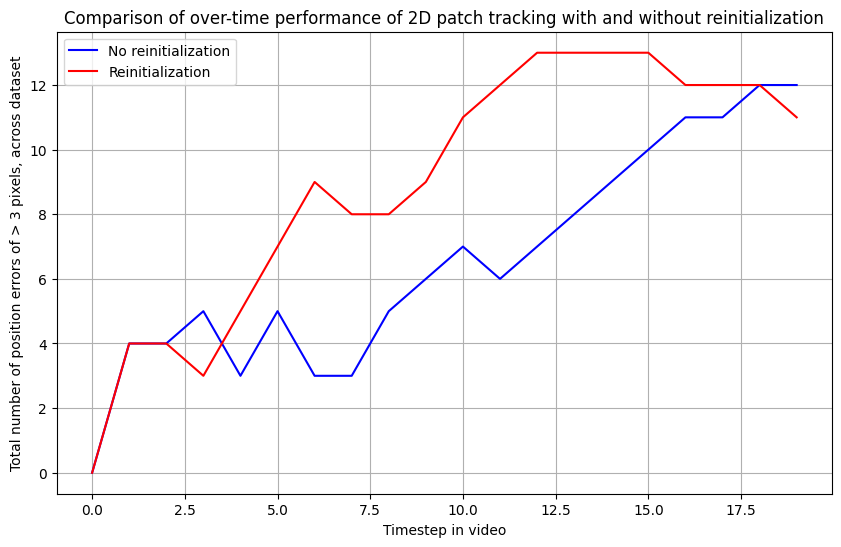

In [48]:
# Create the plot
plt.figure(figsize=(10, 6))

x = jnp.arange(0, len(sum_of_n_errors_above_threshold_per_frame))

# Plot the first line
plt.plot(x, sum_of_n_errors_above_threshold_per_frame, label='No reinitialization', color='blue')

# Plot the second line
plt.plot(x, sum_of_n_errors_above_threshold_per_frame_2, label='Reinitialization', color='red')

# Add labels and title
plt.xlabel('Timestep in video')
plt.ylabel('Total number of position errors of > 3 pixels, across dataset')
plt.title('Comparison of over-time performance of 2D patch tracking with and without reinitialization')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()